In [112]:
!pip install pandas
!pip install -U pandasql
!pip install seaborn
!pip install -U matplotlib
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\srini\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\srini\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\srini\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\srini\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\srini\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


In [114]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [115]:
orders = pd.read_csv('data/restaurant-1-orders.csv')
orders.columns = ['number', 'timestamp' , 'item' , 'quantity' , 'price' , 'total_prodcuts_in_cart']

In [116]:
orders.sample(2)

,number,timestamp,item,quantity,price,total_prodcuts_in_cart
68905,8269,21/01/2018 19:24,Chicken Tikka Sizzler,1,9.95,5
55164,14618,03/05/2019 20:01,Chicken Tikka Masala,1,8.95,3


In [117]:
orders['date'] = pd.to_datetime(orders['timestamp'].str[:10], errors='coerce')


In [118]:
orders.sample(5)

,number,timestamp,item,quantity,price,total_prodcuts_in_cart,date
59090,9881,10/06/2018 18:27,Chicken Tikka Jalfrezi,1,8.95,7,2018-10-06
65124,2711,19/06/2016 17:10,Chicken Tikka Masala,1,8.95,8,NaT
59533,9315,22/04/2018 16:59,Chicken Tikka Masala,1,8.95,10,NaT
1368,13568,24/02/2019 18:36,Mango Chutney,1,0.50,7,NaT
69961,5562,29/05/2017 19:08,Vegetable Balti,1,9.95,4,NaT


In [119]:
print(f"Total number of unique records: {orders['number'].nunique()}")

Total number of unique records: 13397


In [120]:
def load_query(path):
    with open(path) as file:
        return file.read()

In [121]:
query = load_query('queries/daily_orders.sql')
daily_orders = pysqldf(query)

In [122]:
daily_orders.sample(5)

,date,num_orders
427,2019-06-02,9
93,2016-11-11,12
445,2019-08-06,24
284,2018-04-04,5
401,2019-02-06,13


In [123]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

AttributeError: 'Axes' object has no attribute 'tick_parms'

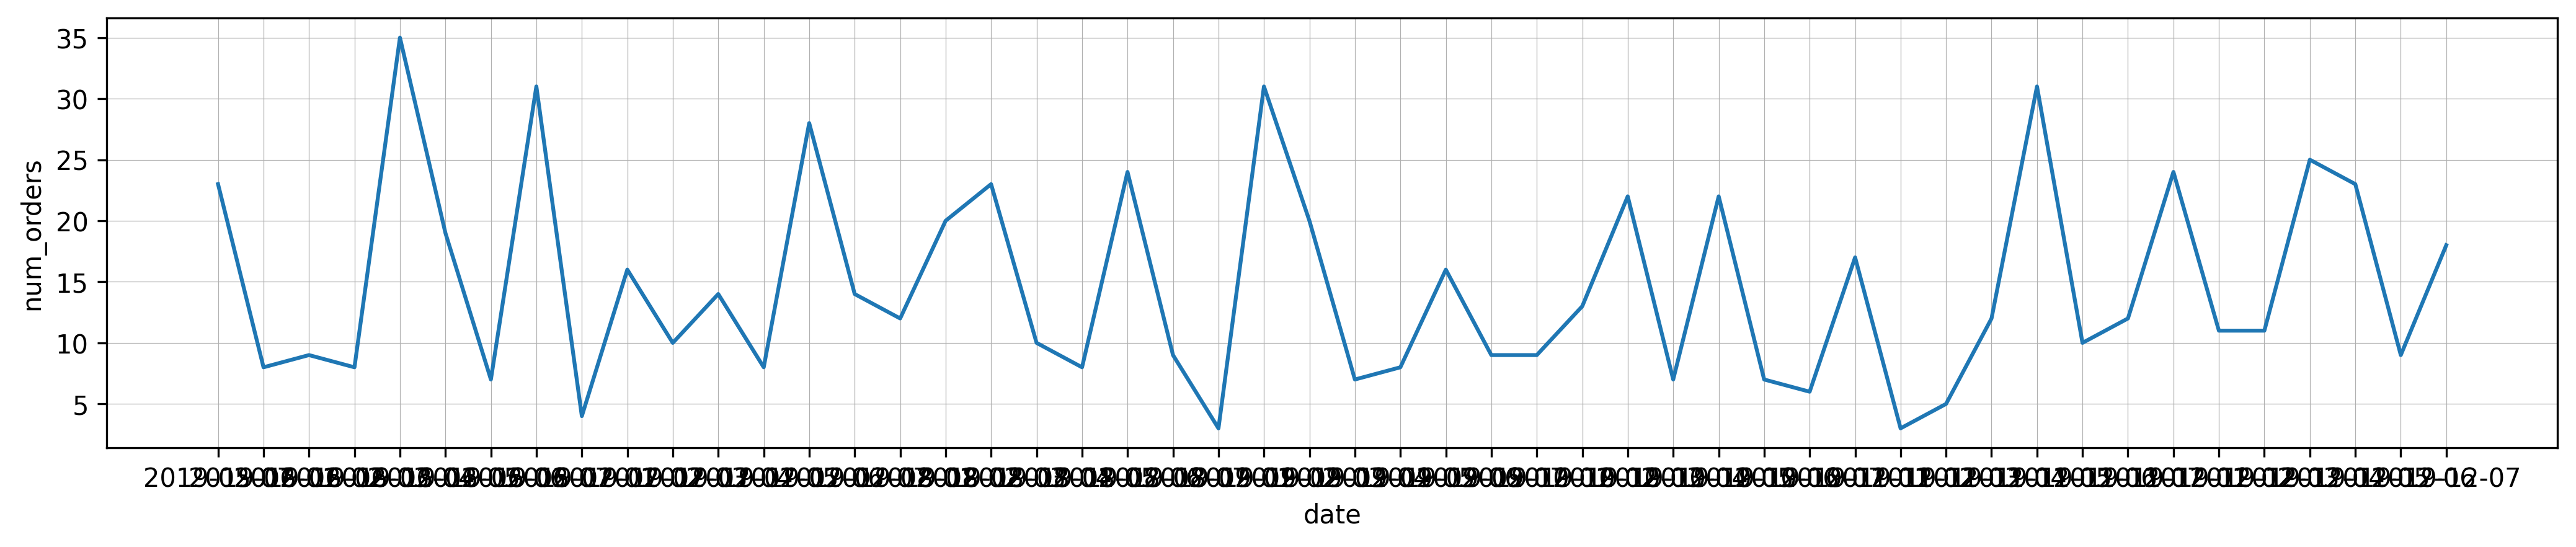

In [124]:
plt.rcParams.update({'figure.figsize': (17, 3) , 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=daily_orders.tail(50), x='date' , y='num_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_parms(axis='x' , rotation=90)

In [ ]:
query = load_query('queries/weekly_orders.sql')
weekly_orders = pysqldf(query)

In [ ]:
weekly_orders.sample(5)

,week,num_orders
75,2018-05-07,68
54,2017-09-11,32
77,2018-06-04,87
90,2018-11-05,96
104,2019-05-27,17


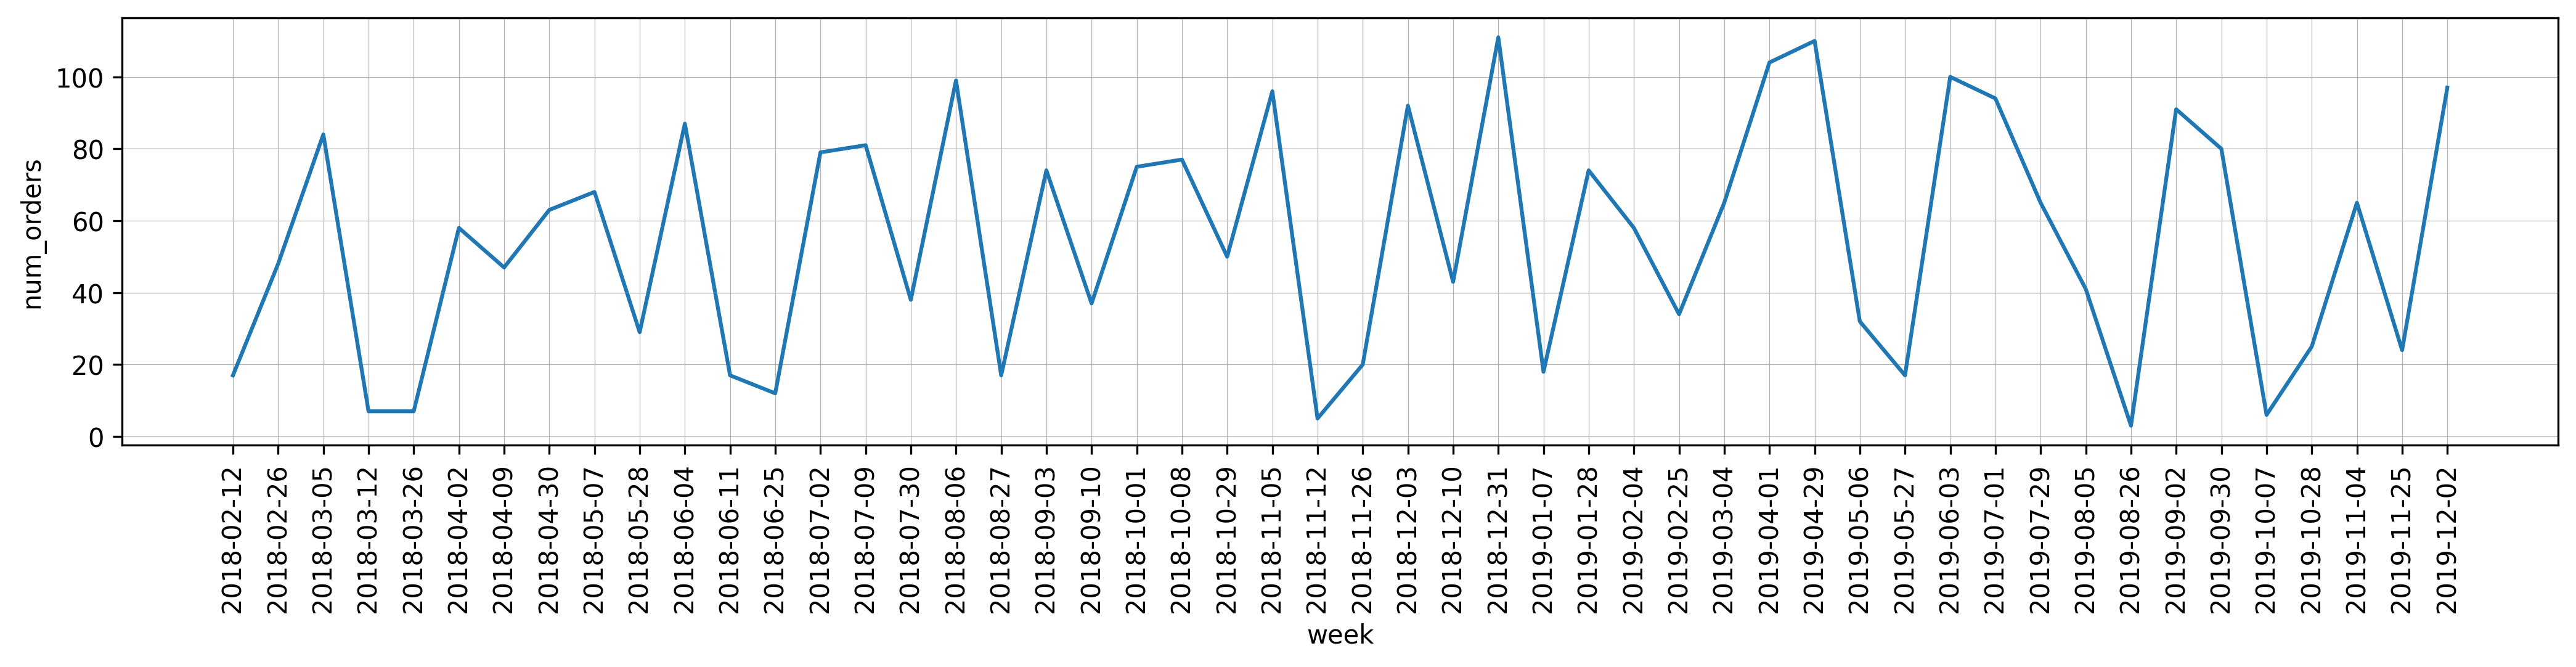

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=weekly_orders.tail(50), x='week', y='num_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
query = load_query('queries/base.sql')
df = pysqldf(query)
df.to_csv('csvs/dataset.csv')

In [ ]:
df.sample(3)

,week,order_count_7_day,order_count_30_day,label
51,2017-10-09,54,119,44
99,2019-06-03,17,105,100
60,2018-01-29,0,140,73


In [ ]:
features = ['order_count_7_day', 'order_count_30_day']
label = 'label'
test_df = df[df['week'] >= '2019-06-01']
train_df = df[df['week'] < '2019-06-01']
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [ ]:
import xgboost as xgb
print(xgb.__version__)


2.1.1


In [125]:
reg = XGBRegressor(n_estimators=500, learning_rate=0.01,  eval_metric='mae')
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
       
        verbose=True)

[0]	validation_0-mae:24.35498	validation_1-mae:34.25606
[1]	validation_0-mae:24.20922	validation_1-mae:34.31387
[2]	validation_0-mae:24.06471	validation_1-mae:34.37124
[3]	validation_0-mae:23.92144	validation_1-mae:34.42819


[4]	validation_0-mae:23.77940	validation_1-mae:34.48470
[5]	validation_0-mae:23.63868	validation_1-mae:34.54124
[6]	validation_0-mae:23.49905	validation_1-mae:34.59691
[7]	validation_0-mae:23.35711	validation_1-mae:34.65596
[8]	validation_0-mae:23.21638	validation_1-mae:34.71455
[9]	validation_0-mae:23.07688	validation_1-mae:34.75935
[10]	validation_0-mae:22.94217	validation_1-mae:34.81715
[11]	validation_0-mae:22.80734	validation_1-mae:34.87408
[12]	validation_0-mae:22.67564	validation_1-mae:34.93100
[13]	validation_0-mae:22.54464	validation_1-mae:34.97464
[14]	validation_0-mae:22.41991	validation_1-mae:35.02312
[15]	validation_0-mae:22.29626	validation_1-mae:35.07124
[16]	validation_0-mae:22.17030	validation_1-mae:35.10607
[17]	validation_0-mae:22.04874	validation_1-mae:35.15355
[18]	validation_0-mae:21.92822	validation_1-mae:35.20066
[19]	validation_0-mae:21.80873	validation_1-mae:35.24742
[20]	validation_0-mae:21.68890	validation_1-mae:35.28177
[21]	validation_0-mae:21.56931	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [126]:
predictions = reg.predict(X_test)

In [127]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

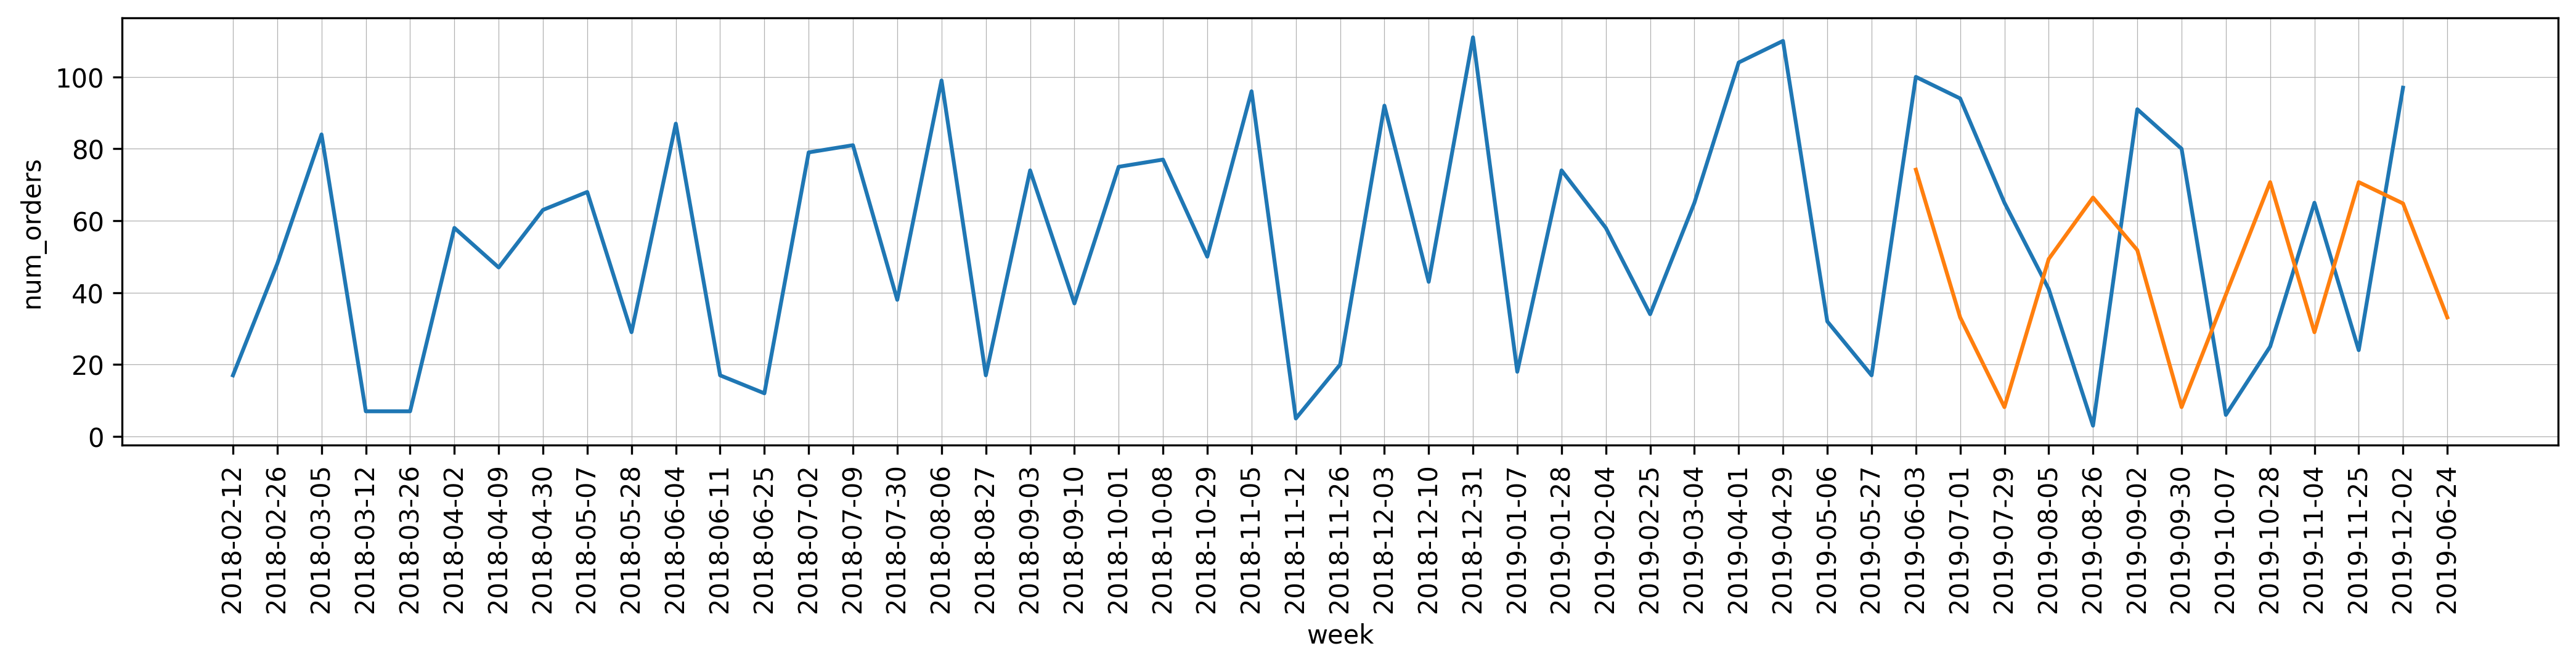

In [128]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=weekly_orders.tail(50), x='week', y='num_orders')
sns.lineplot(data=test_df, x='week', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [129]:

test_df

,week,order_count_7_day,order_count_30_day,label,predictions
0,2019-06-03,17,105,100,74.200615
1,2019-06-24,0,117,0,33.121243
2,2019-07-01,0,117,94,33.121243
3,2019-07-29,0,94,65,8.159939
4,2019-08-05,65,107,41,49.350578
5,2019-08-26,0,106,3,66.438782
6,2019-09-02,3,77,91,51.820084
7,2019-09-30,0,94,80,8.159939
8,2019-10-28,0,86,25,70.724365
9,2019-11-04,25,60,65,28.989826
